###### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###### Importing the Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

###### Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#how many rows and columns are there
df.shape

(891, 12)

In [7]:
#checking the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Find out null value in each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

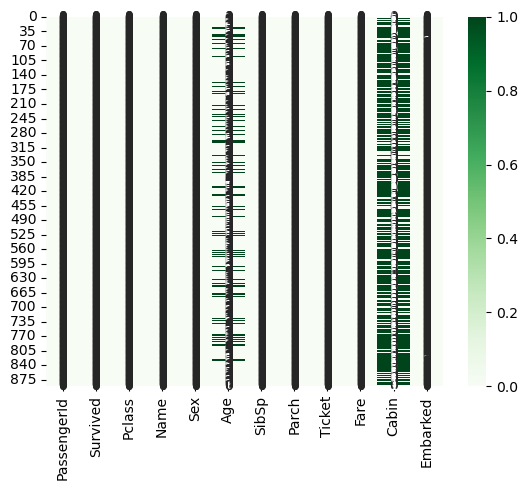

In [9]:
# show the null value of columns using Heatmap
sns.heatmap(df.isnull(),annot=True,cmap='Greens')

###### Data Cleaning

In [10]:
#I want to know How many percentage of null value in Age column
(df['Age'].isnull().sum()/df.shape[0])*100

19.865319865319865

In [11]:
#I want to know How many percentage of null value in Cabin column
(df['Cabin'].isnull().sum()/df.shape[0])*100

77.10437710437711

In [12]:
#how many unique value in Cabin column
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
#Drop the Cabin feature 
df.drop("Cabin",axis=1,inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#Checking the no of Null value in each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
# How many categories in Embarked columns
df.Embarked.unique()

#s - Southampton
#Q - Queenstown
#c - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
#show me datapoint where Embarked is null
df[df['Embarked'].isnull()] #['Embarked']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
# show me all Embarked value where Pclass is 1
df[df.Pclass==1]['Embarked'].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [19]:
# show me all Embarked value where Pclass is 2
df[df.Pclass==2]['Embarked'].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [20]:
# show me all Embarked value where Pclass is 3
df[df.Pclass==3]['Embarked'].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [21]:
# show me all Embarked value where Fare is 80.0
df[df.Fare==80.0]['Embarked'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
# show me all Embarked value where Ticket is 113572
df[df.Ticket==113572]['Embarked'].value_counts()

Series([], Name: count, dtype: int64)

In [23]:
#Mean of Age column
df.Age.mean()

29.69911764705882

In [24]:
#Median of Age Column
df.Age.median()

28.0

In [25]:
#Mode of Age Column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

<Axes: >

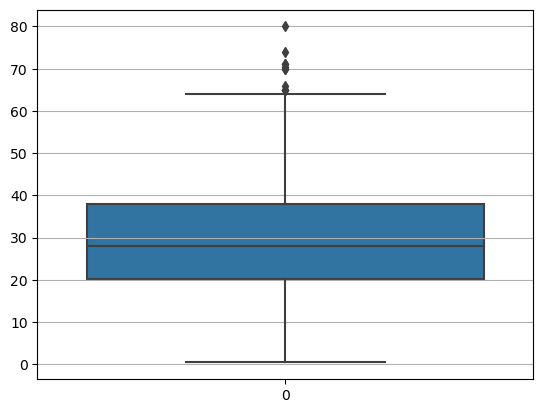

In [26]:
#plot a boxplot to find out the outliers in Age Column
plt.grid()
sns.boxplot(df.Age)

In [27]:
#Find occurance of values
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [28]:
#Fill allthe null values in the Age aolumn with its median value
df.Age.fillna(value=df.Age.median(),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_16708\2187290661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(value=df.Age.median(),inplace=True)


In [30]:
# Drop those Datapoint where Embarked value is null
#df.drop([61,829],inplace=True)
df.dropna(inplace=True)

In [31]:
#Checking the no of Null value in each columns
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
#Drop off the columns PassengerId,Name,Ticket
df.drop(['PassengerId','Name',"Ticket"],axis=1,inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


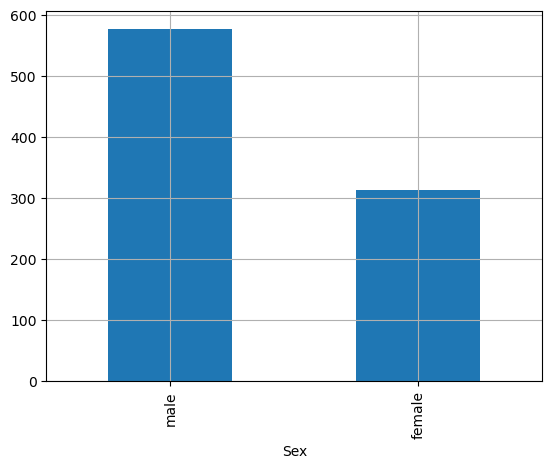

In [35]:
#plot a graph Strength of Male v/s Strength of Female

df.Sex.value_counts().plot(kind='bar')
plt.grid()

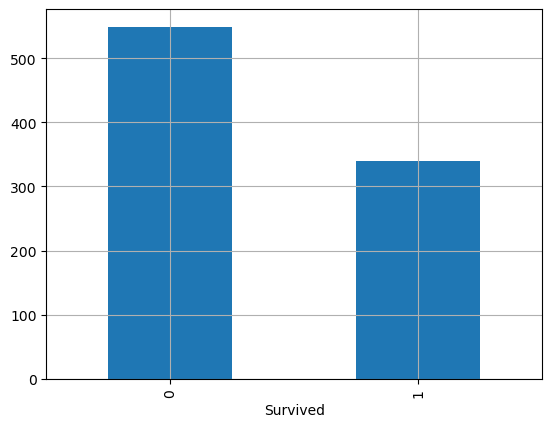

In [36]:
#plot a graph Strength of Survived v/s Strength of not Survived

df.Survived.value_counts().plot(kind='bar')
plt.grid()

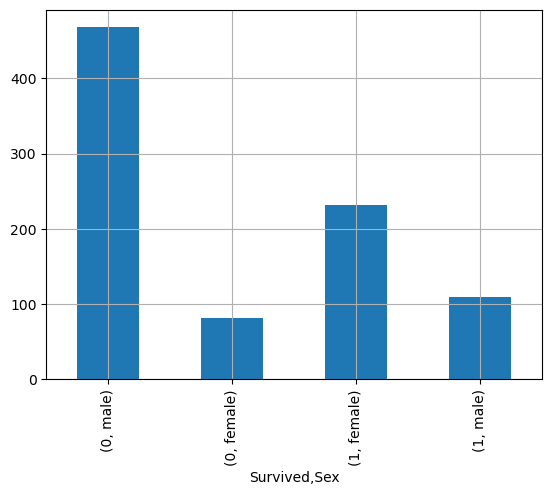

In [38]:
#plot a graph how many male is Survive and non-Survive? 
#How many female is survive and non-Survive?
df.Sex.groupby(df.Survived).value_counts().plot(kind='bar')
plt.grid()

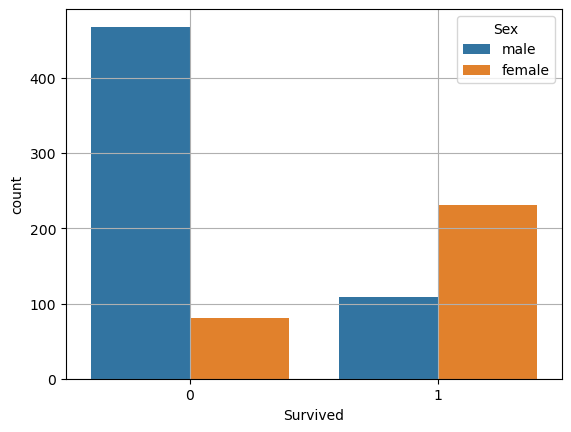

In [39]:
#plot a graph how many male is Survive and non-Survive? 
#How many female is survive and non-Survive?
sns.countplot(x="Survived",data=df,hue='Sex')
plt.grid()

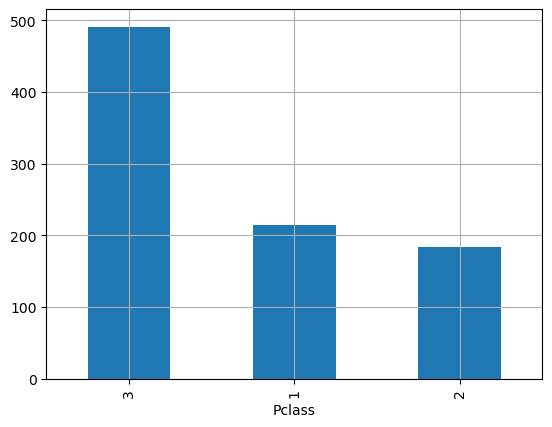

In [40]:
#plot a graph to find out Strength of Strength of the Pclass
df.Pclass.value_counts().plot(kind='bar')
plt.grid()

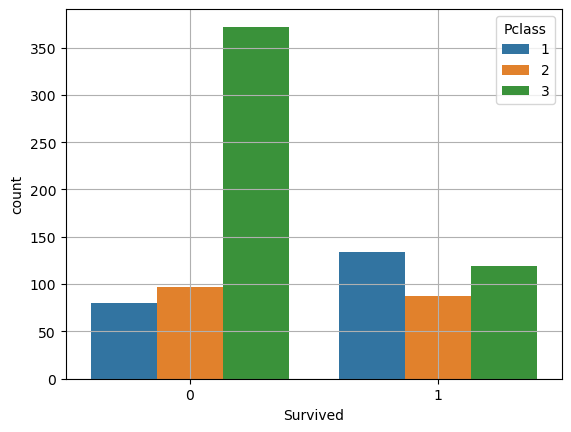

In [41]:
sns.countplot(x="Survived",data=df,hue='Pclass')
plt.grid()

Encoders -To Convert the data from the categorical form to 
numberical from without changing its meaning

Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])

In [44]:
# convert dtype of Age float to int
df['Age']=df['Age'].astype('int')

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [46]:
new_df=df.copy()

In [47]:
#Round off the Fare column value at 2 place
df['Fare']=round(df['Fare'],2)

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


OneHotEncoder for column Embarked

In [49]:
newdf=pd.get_dummies(df.Embarked)

In [50]:
newdf.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [51]:
#concate the two dataframe 
df=pd.concat([df,newdf],axis=1)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,False,False,True
1,1,1,0,38,1,0,71.28,C,True,False,False
2,1,3,0,26,0,0,7.92,S,False,False,True
3,1,1,0,35,1,0,53.10,S,False,False,True
4,0,3,1,35,0,0,8.05,S,False,False,True


In [53]:
#Drop the column 'Embarked','C'
df.drop(['Embarked','C'],axis=1,inplace=True)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,False,True
1,1,1,0,38,1,0,71.28,False,False
2,1,3,0,26,0,0,7.92,False,True
3,1,1,0,35,1,0,53.10,False,True
4,0,3,1,35,0,0,8.05,False,True


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    bool   
 8   S         889 non-null    bool   
dtypes: bool(2), float64(1), int32(2), int64(4)
memory usage: 50.4 KB


<Axes: >

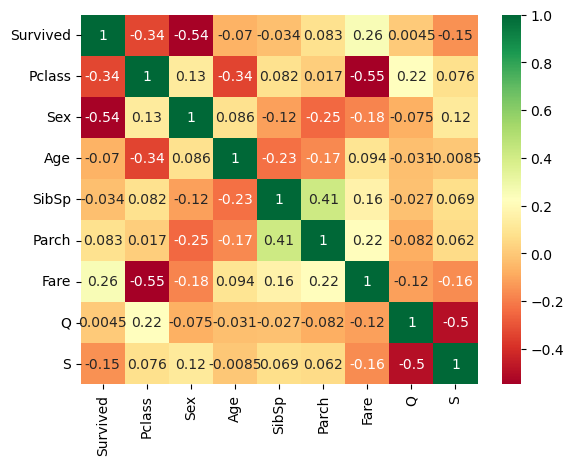

In [56]:
sns.heatmap(data=df.corr(),annot=True,cmap='RdYlGn')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

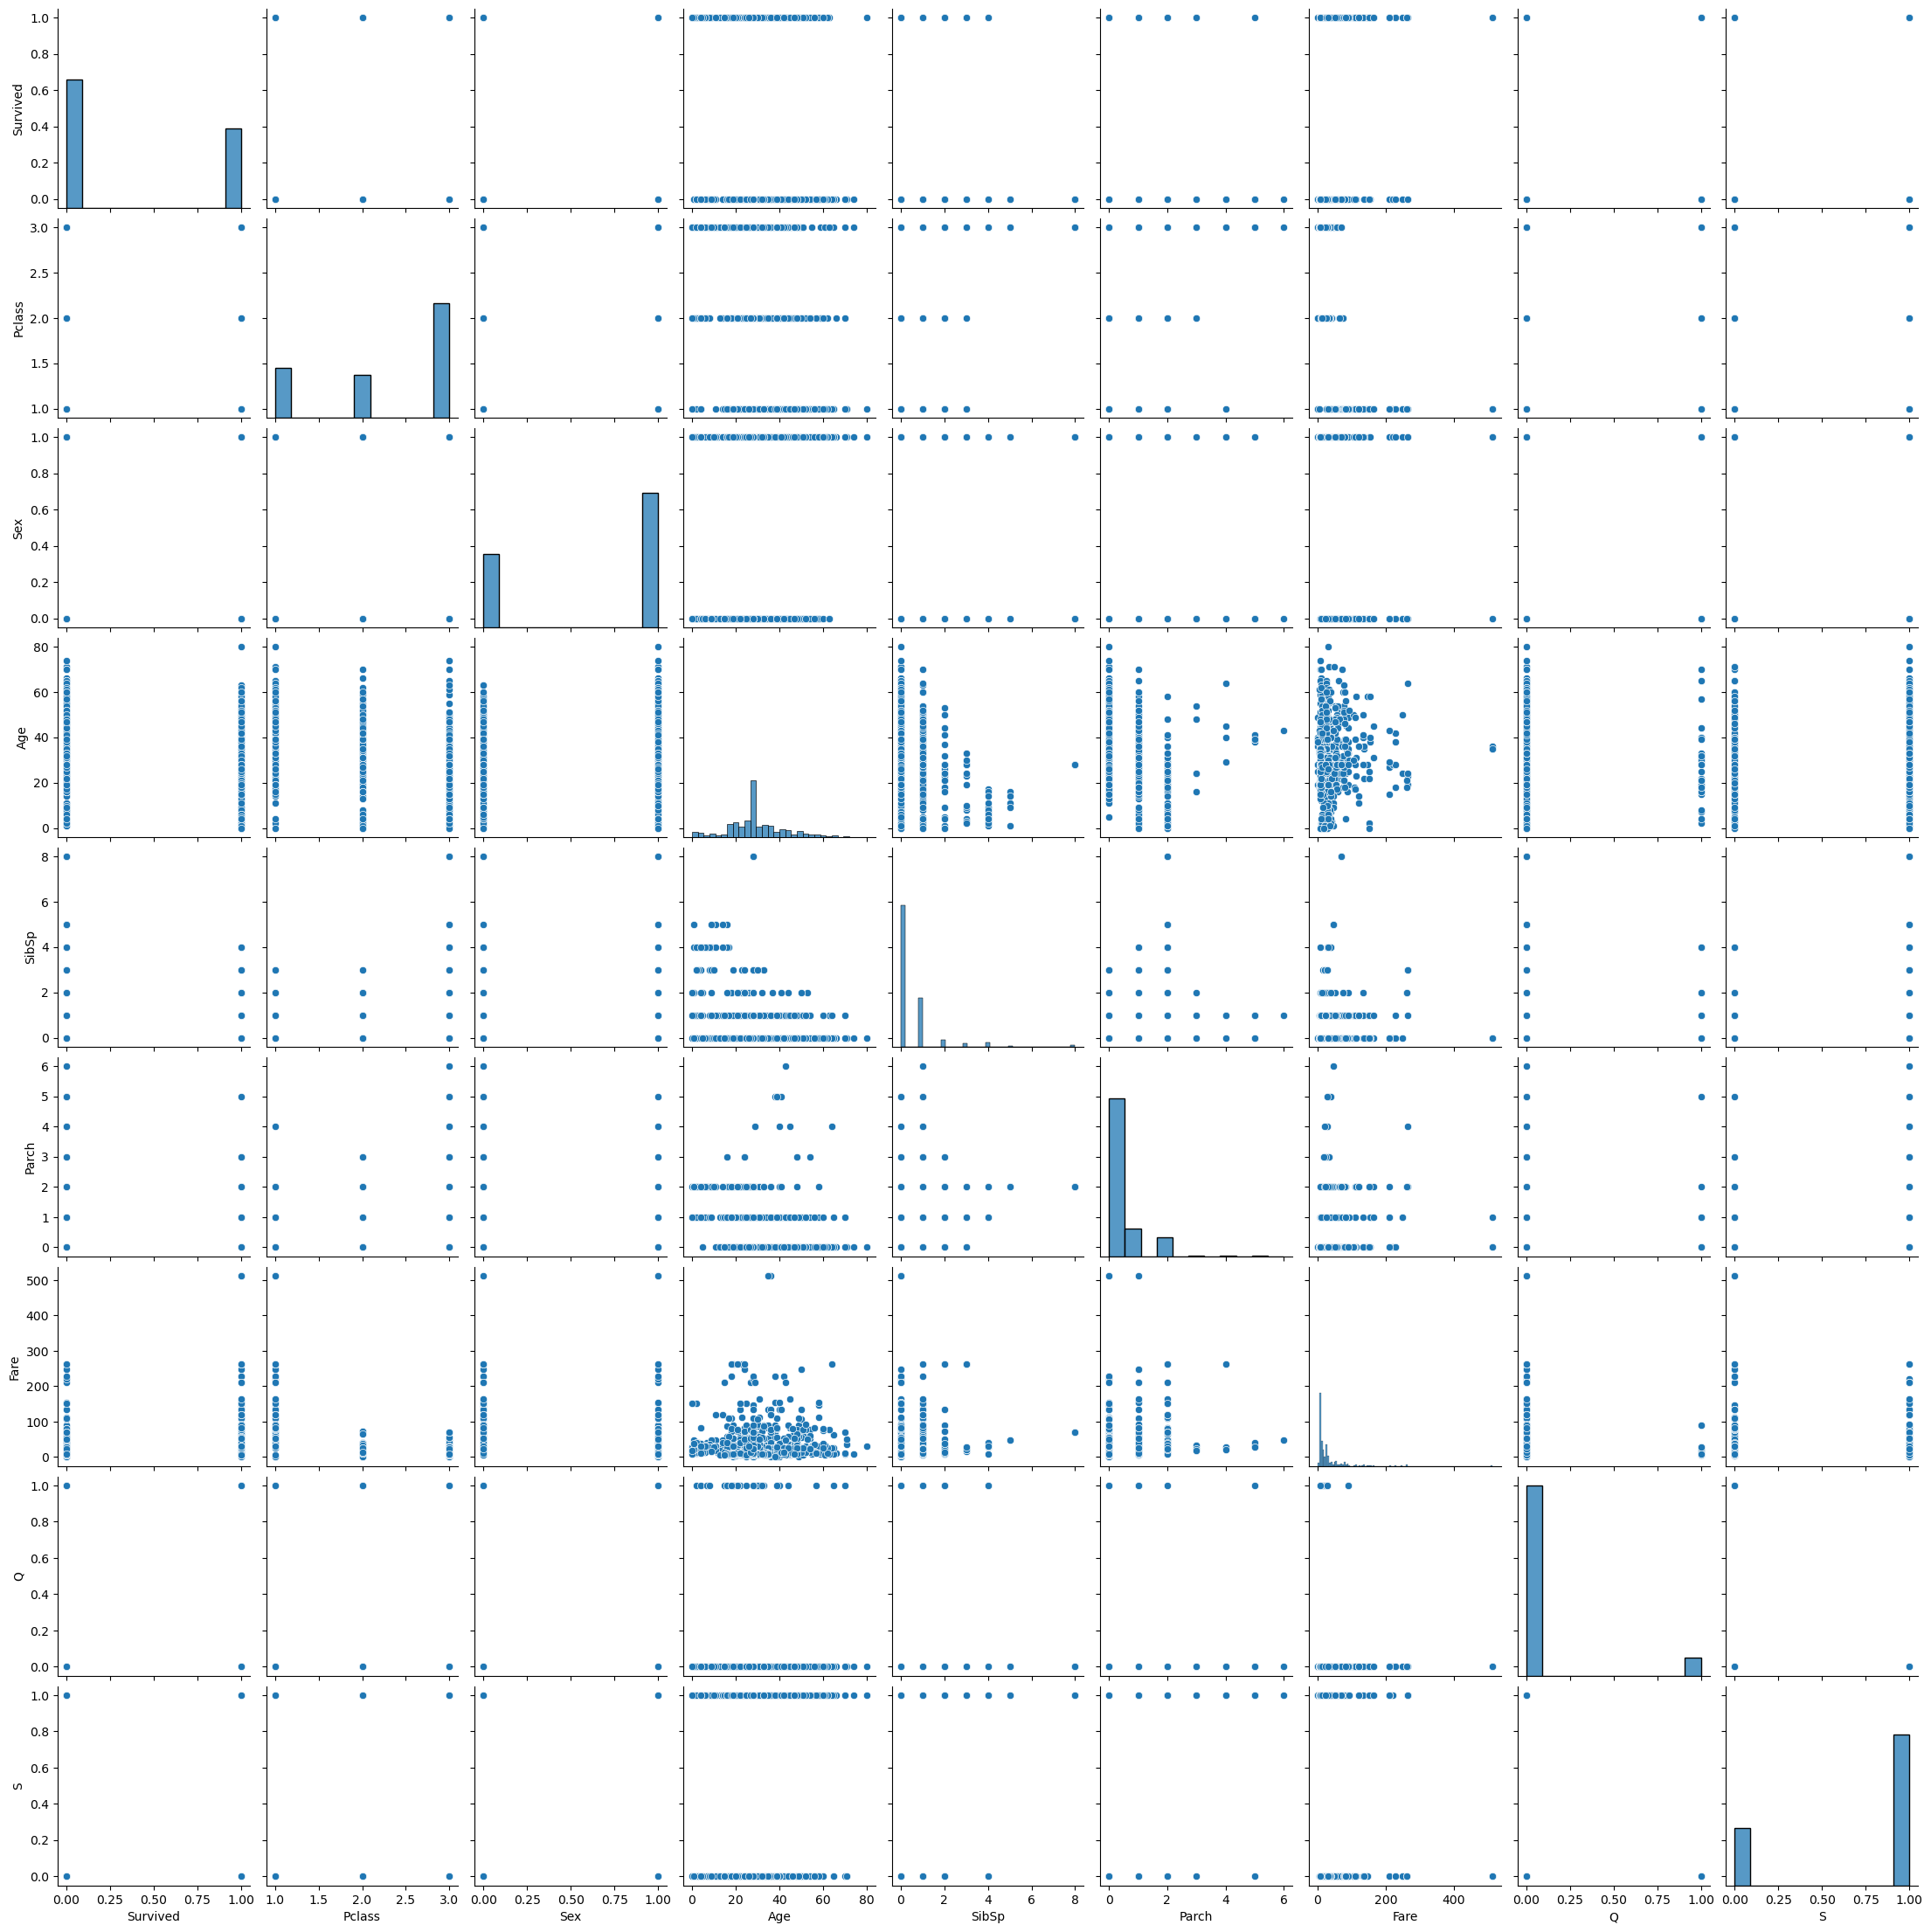

In [57]:
sns.pairplot(df)

###### Feature Importance

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,False,True
1,1,1,0,38,1,0,71.28,False,False
2,1,3,0,26,0,0,7.92,False,True
3,1,1,0,35,1,0,53.10,False,True
4,0,3,1,35,0,0,8.05,False,True


In [60]:
#split features and target
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
feat=ExtraTreesClassifier()

In [65]:
feat.fit(x,y)

ExtraTreesClassifier()

In [66]:
feat.feature_importances_

array([0.10678064, 0.29219433, 0.246097  , 0.04692638, 0.04273293,
       0.23595643, 0.00817581, 0.02113648])

<Axes: >

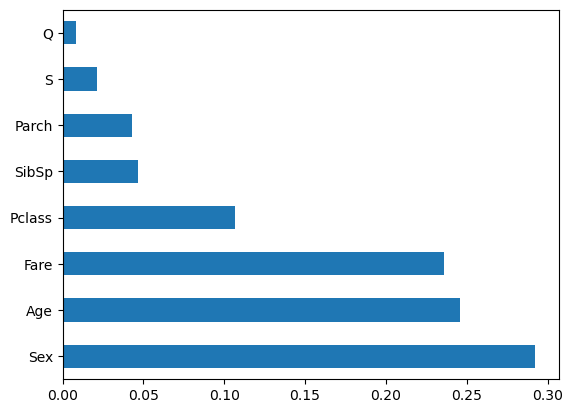

In [70]:
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(8).plot(kind='barh')

# Machine Learning

spliting the data

In [71]:
kfold=KFold(n_splits=5)
skf=StratifiedKFold(n_splits=5)

In [72]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

###### Model Selection

In [77]:
classifier=LogisticRegression()

Train the model

In [78]:
classifier.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Test the model

In [79]:
y_pred=classifier.predict(x_test)

###### EDA

In [80]:
target=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

<Axes: >

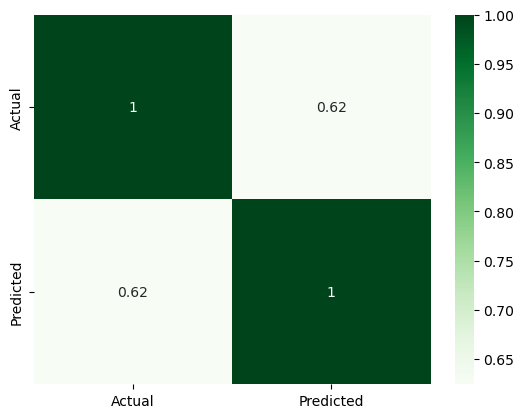

In [81]:
sns.heatmap(data=target.corr(),annot=True,cmap='Greens')

Performace Metrics ->Confusion Matrixm

In [84]:
confusion_matrix(y_test,y_pred)

array([[98, 11],
       [20, 48]], dtype=int64)

In [ ]:
#accuracy=(98+48)/Total
#=146/177 = 0.824

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_pred)

0.8248587570621468

In [86]:
from sklearn.metrics import classification_report

In [88]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

###### Exportation of model & dataset

In [94]:
import pickle

In [95]:
pick=pickle.dumps(classifier)

In [ ]:
unpickle=pickle.load(pick)